In [19]:
from preparing_script import profile_plot, gransostav_plot
import pandas as pd 
import numpy as np 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
agrochemistry_total = pd.read_csv('полевые данные общая/ready_data/агрохимия_правленная_1.csv', sep = ';' ) #важно сомтреть чтобы была правленная агрохимия
agrochemistry_total["Год"] = agrochemistry_total["Год"].astype(str)
agrochemistry_total["GPS №"] = agrochemistry_total["GPS №"].astype(str)

agrochemistry_total['depth'] = agrochemistry_total["Глубина"].str.split('-', expand=True)[0]
agrochemistry_total['depth'] = agrochemistry_total['depth'].astype(int)
agrochemistry_total = agrochemistry_total.round(2)
agrochemistry_total = agrochemistry_total.drop('Массовая доля общего содержания карбонатов (по Козловскому), %(CaCO3)', axis = 1)

agrochemistry_total = agrochemistry_total[agrochemistry_total['повторность'] == '[0]']


gran_sostav = pd.read_csv('полевые данные общая/ready_data/гранулометрический состав.csv')
gran_sostav["GPS №"] = gran_sostav["GPS №"].astype(str)

# 585

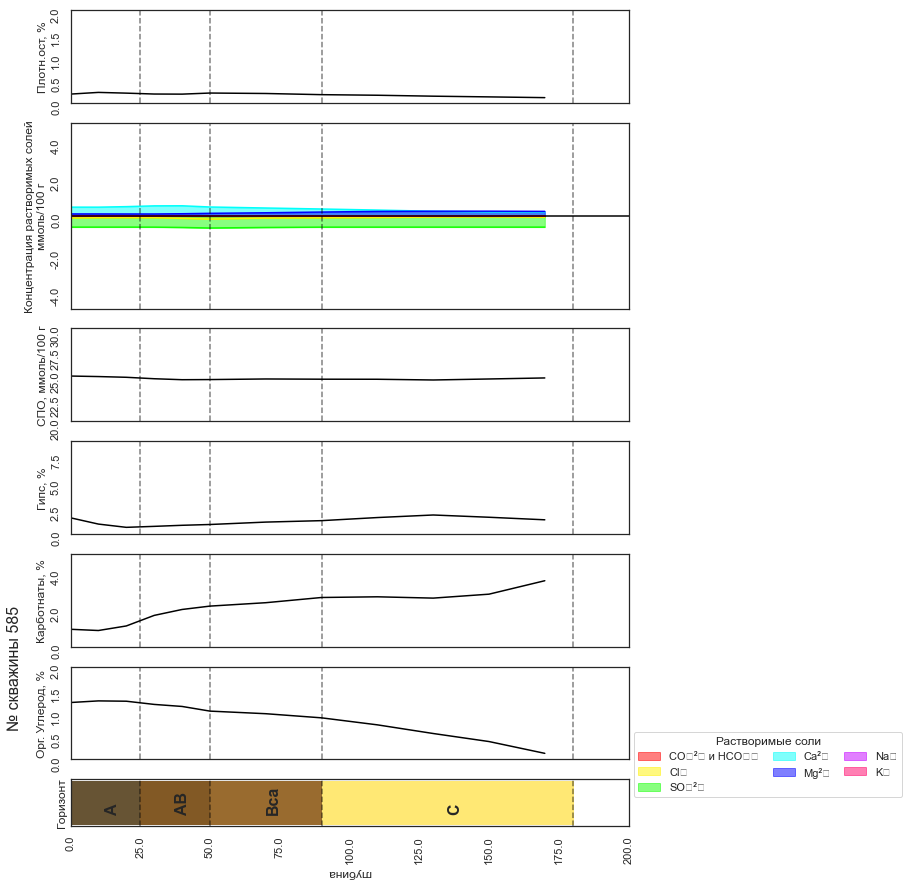

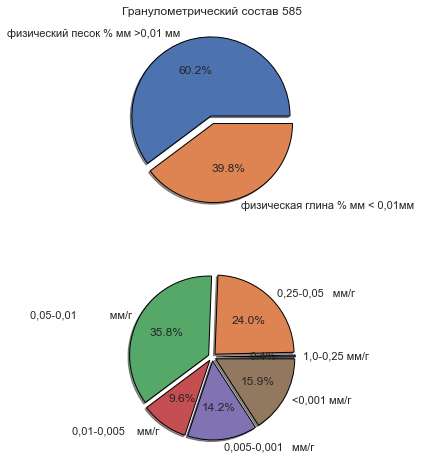

In [20]:
horizonts = ['A',"AB" , "Bca",'C']
depth = [[0,25],[25,50], [50 ,90],[90,180]]
colors =["#675434","#825925","#996B2F", "#FFE874"]
profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '585'], '585' , horizonts, depth, colors)

gransostav_plot(gran_sostav,'585' )

In [18]:
plt.show()

NameError: name 'plt' is not defined

# 584

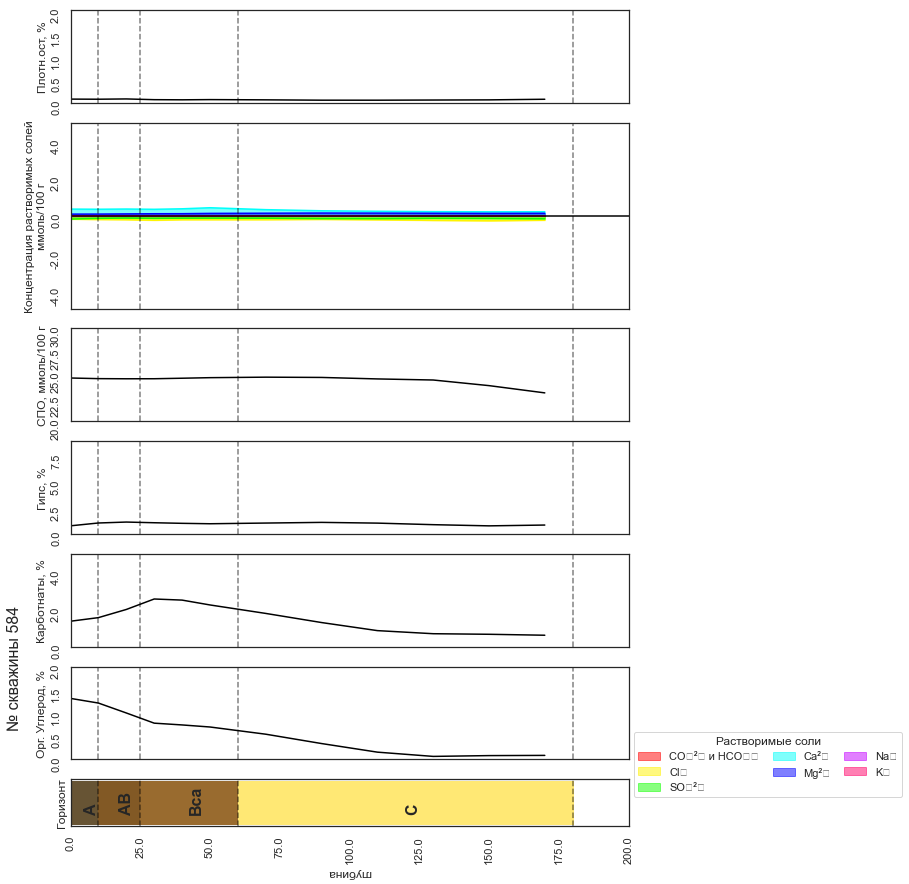

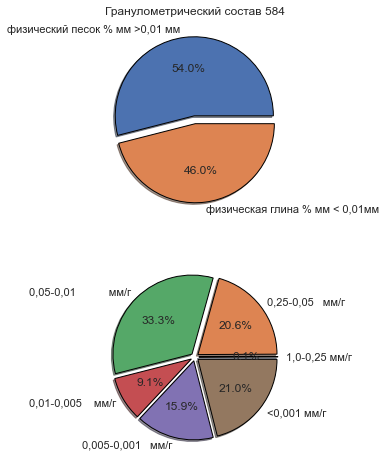

In [12]:
horizonts = ['A',"AB" , "Bca",'C']
depth = [[0,10],[10,25], [25 ,60],[60,180]]
colors =["#675434","#825925","#996B2F", "#FFE874"]
profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '584'], '584' , horizonts, depth, colors)


gransostav_plot(gran_sostav,'584' )

# 529 

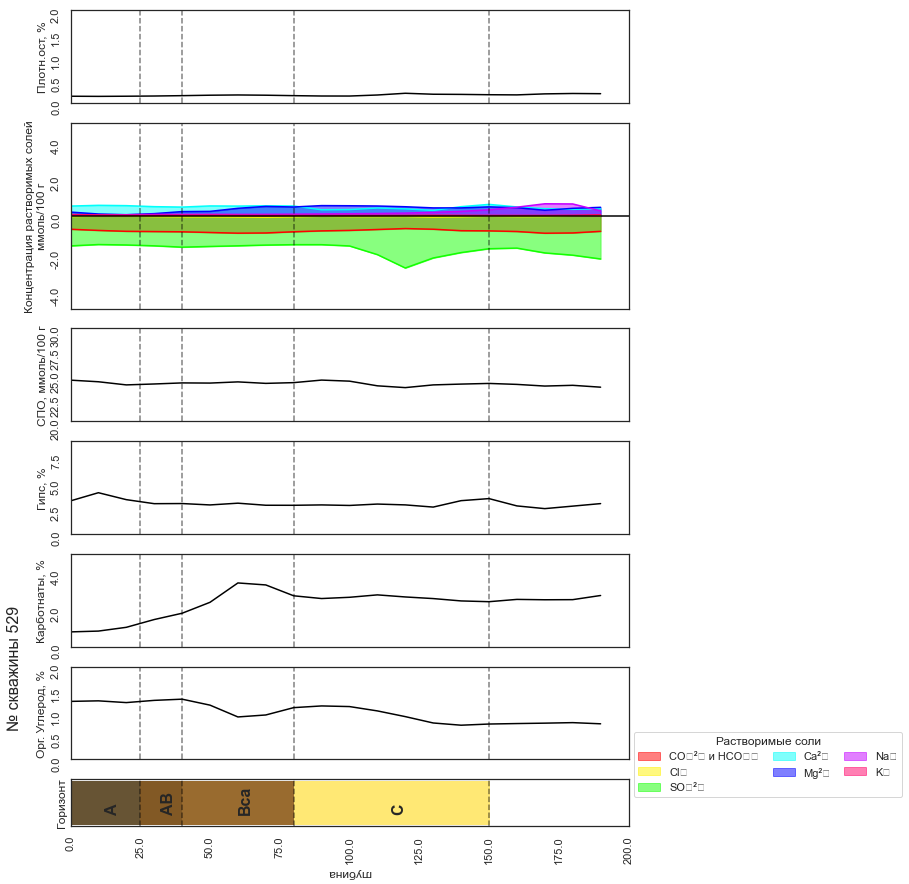

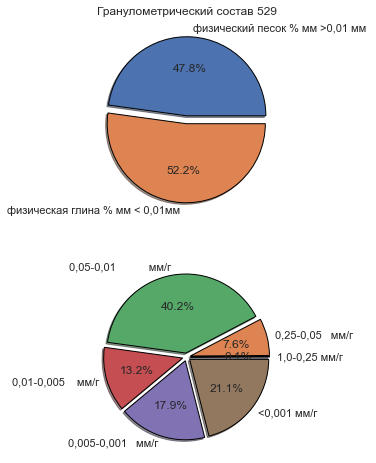

In [13]:
horizonts = ['A',"AB" , "Bca",'C']
depth = [[0,25],[25,40], [40 ,80],[80,150]]
colors =["#675434","#825925","#996B2F", "#FFE874"]
profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '529'], '529' , horizonts, depth, colors)

gransostav_plot(gran_sostav,'529' )

# 527 - ЗАПРОСИТЬ У ИЛЦ ДАННЫЕ И ПЕРЕДАЛТЬ!

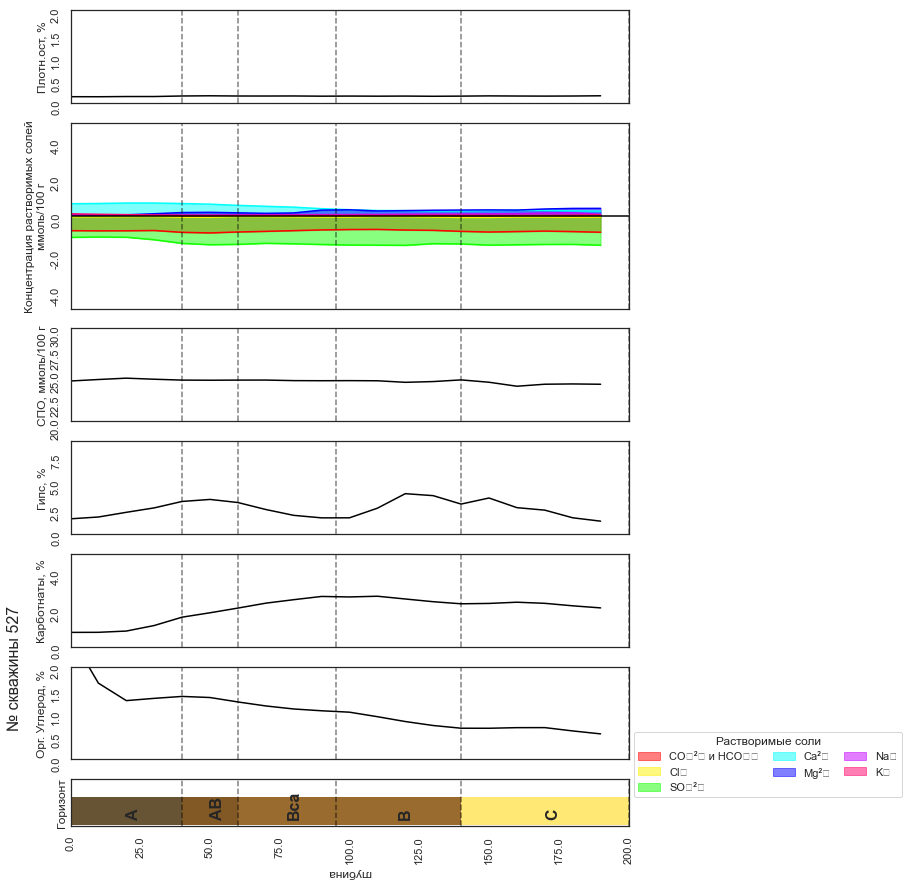

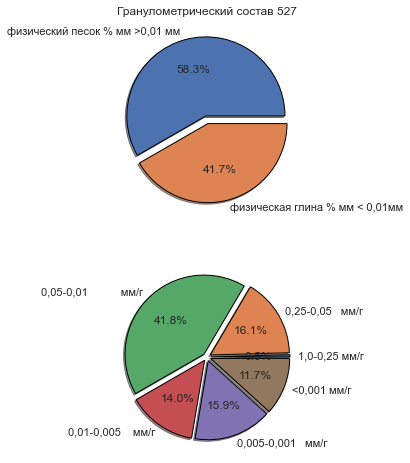

In [15]:
horizonts = ['A',"AB" , "Bca",'B','C']
depth = [[0,40],[40,60], [60 ,95],[95,140],[140,200]]
colors =["#675434","#825925","#996B2F","#996B2F", "#FFE874"]

profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '527'], '527' , horizonts, depth, colors)
gransostav_plot(gran_sostav,'527' )





# 586

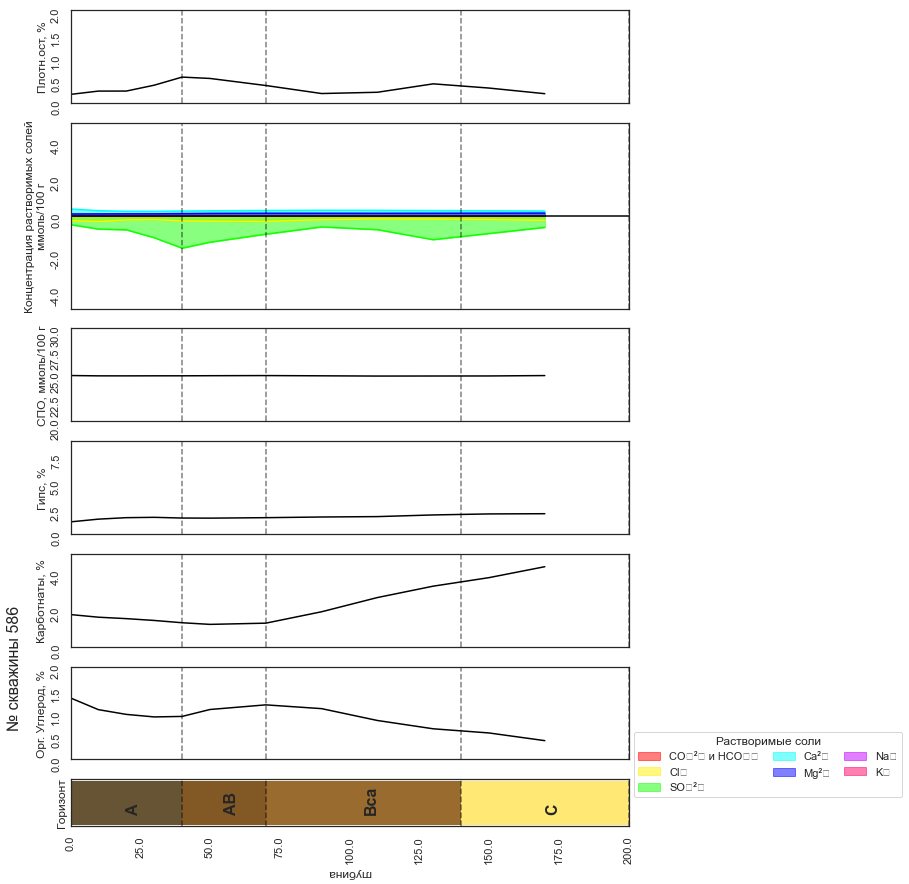

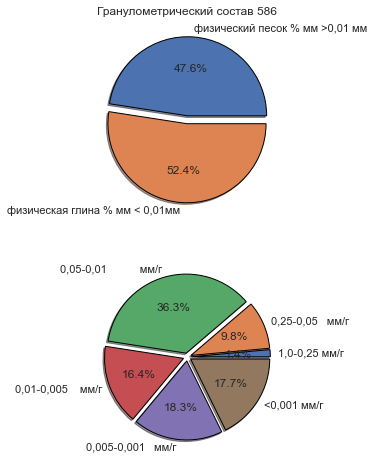

In [ ]:
horizonts = ['A',"AB" , "Bca",'C']
depth = [[0,40],[40,70], [70 ,140],[140,200]]
colors =["#675434","#825925","#996B2F", "#FFE874"]

profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '586'], '586' , horizonts, depth, colors)
gransostav_plot(gran_sostav,'586' )


# 525

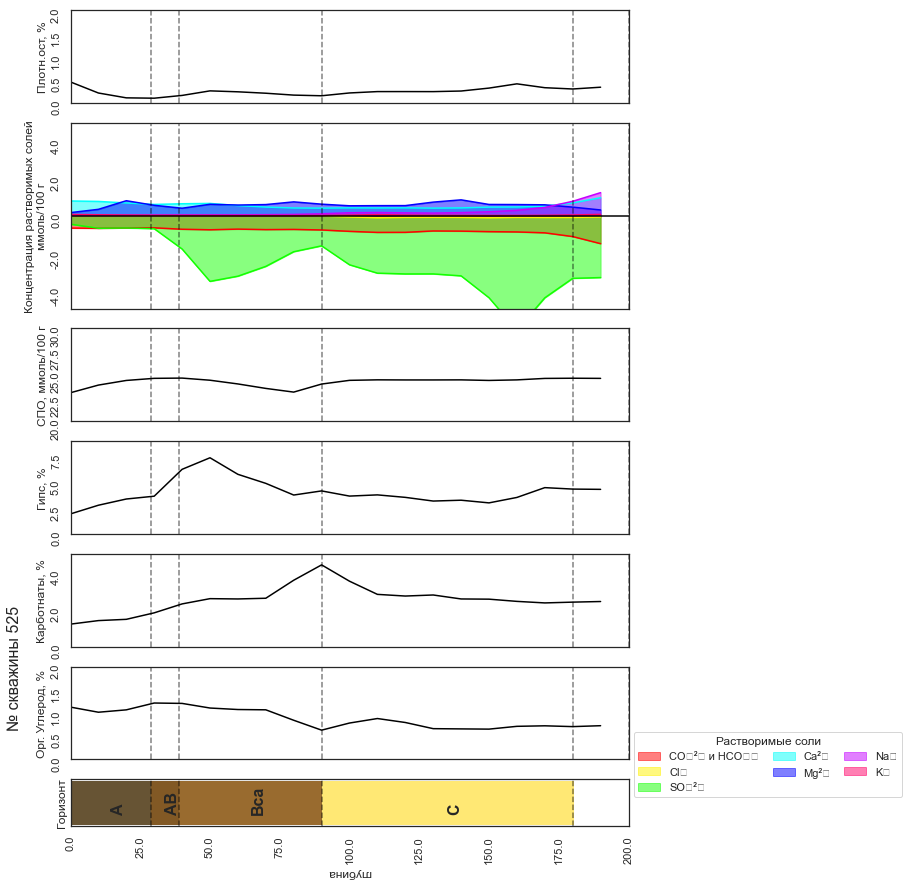

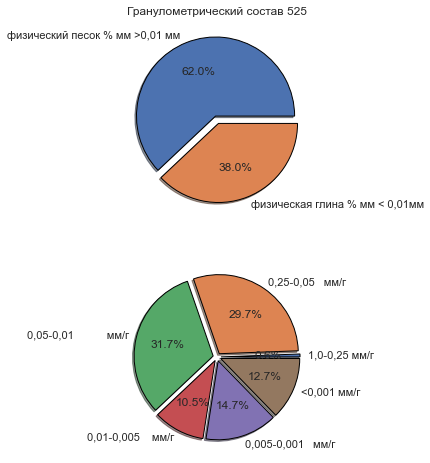

In [21]:
horizonts = ['A',"AB" , "Bca",'C']
depth = [[0,29],[29,39], [39 ,90],[90,180],[150,200]]
colors =["#675434","#825925","#996B2F", "#FFE874"]

profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '525'], '525' , horizonts, depth, colors)

gransostav_plot(gran_sostav,'525' )


# 526

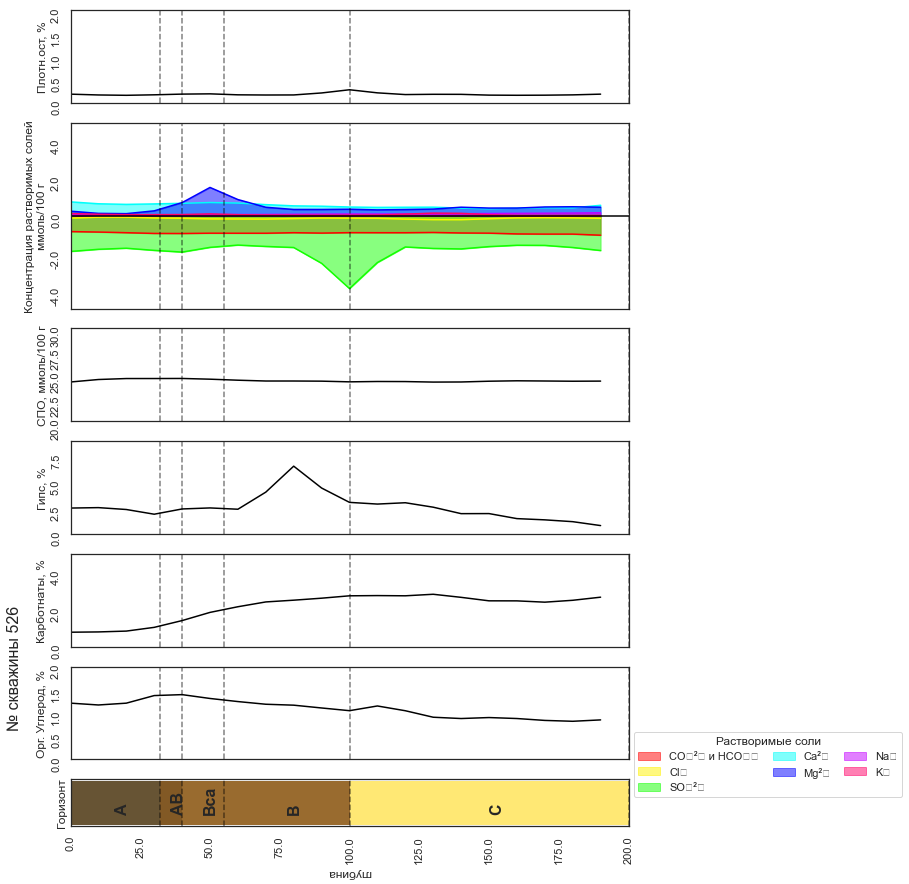

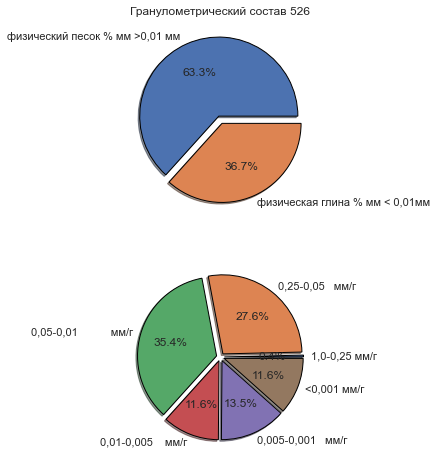

In [ ]:
horizonts = ['A',"AB" , "Bca",'B','C']
depth = [[0,32],[32,40], [40 ,55],[55,100],[100,200]]
colors =["#675434","#825925","#996B2F","#996B2F", "#FFE874"]

profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '526'], '526' , horizonts, depth, colors)

gransostav_plot(gran_sostav,'526' )



# 528

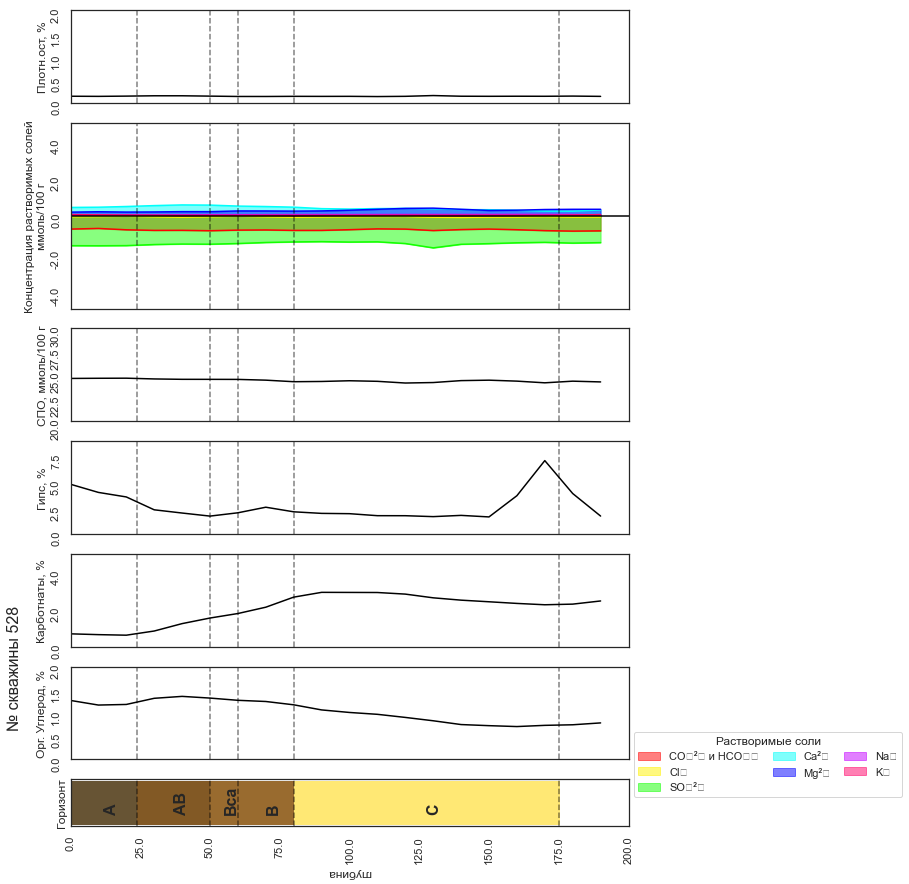

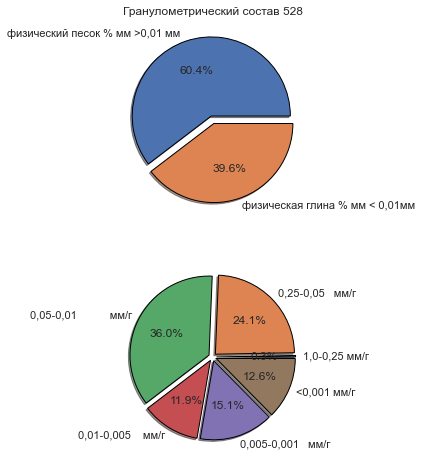

In [ ]:
horizonts = ['A',"AB" , "Bca",'B','C']
colors =["#675434","#825925","#996B2F","#996B2F", "#FFE874"]

depth = [[0,24],[24,50], [50 ,60],[60,80],[80,175]]
profile_plot(agrochemistry_total[agrochemistry_total["GPS №"] == '528'], '528' , horizonts, depth, colors)

gransostav_plot(gran_sostav,'528' )



статистическое тестирование по мощности горизонтов между обработками

In [15]:
import numpy as np 
import pandas as pd
from scipy.stats import ttest_ind as T_test
from scipy.stats import variation

In [18]:
A_pp = np.array([29,32,40, 24, 40])
A_AB_pp = np.array([35, 40, 60 , 50,70])
A_tt = np.array([25, 25, 10])
A_AB_tt =np.array([37,50, 25])
total_pp = np.array([90, 100, 140 , 80,140])
total_tt = np.array([80,90, 60])


title_pp = np.array([['ПП'] *  5])
title_tt = np.array([['ТТ'] *  3])


In [19]:
df = pd.DataFrame(data = {
    "A" :np.append(A_pp,A_tt ),
    "A + AB" : np.append(A_AB_pp,A_AB_tt ), 
    "total" : np.append(total_pp,total_tt ), 
    "type" : np.append(title_pp,title_tt )
})

df.groupby(["type"]).agg({ np.mean,  np.std, variation})

A                   A + AB                           total  \
     variation mean       std variation       mean        std variation   
type                                                                      
ПП    0.189727   33  7.000000  0.251103  51.000000  14.317821  0.229984   
ТТ    0.353553   20  8.660254  0.273453  37.333333  12.503333  0.162681   

                             
            mean        std  
type                         
ПП    110.000000  28.284271  
ТТ     76.666667  15.275252

In [13]:
T_test(A_pp,A_tt )

Ttest_indResult(statistic=2.344129304567432, pvalue=0.05751822452659875)

In [20]:
T_test(total_pp,total_tt)

Ttest_indResult(statistic=1.8463723646899908, pvalue=0.11436368319070225)

In [ ]:
df.groupby([type_,'Глубина']).agg({ np.mean,  np.std, variation})